In [1]:
import pandas as pd
import glob
import shutil
import sys
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
file = 'data/train.csv'
df = pd.read_csv(file)

/data/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Delete columns, where all the entries are 0.
df = df.loc[:, (df != 0).any(axis=0)]
print(df.shape)
df.info()

(8921483, 83)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    object
ProductName                                          object
EngineVersion                                        object
AppVersion                                           object
AvSigVersion                                         object
IsBeta                                               int64
RtpStateBitfield                                     float64
IsSxsPassiveMode                                     int64
DefaultBrowsersIdentifier                            float64
AVProductStatesIdentifier                            float64
AVProductsInstalled                                  float64
AVProductsEnabled                                    float64
HasTpm                                               int64
CountryIdentifier                                    int64
CityIdentifier                  

<class 'pandas.core.series.Series'>
MachineIdentifier                                    0.000000
Census_MDC2FormFactor                                0.000000
Census_DeviceFamily                                  0.000000
Census_HasOpticalDiskDrive                           0.000000
Census_OSVersion                                     0.000000
Census_OSArchitecture                                0.000000
Census_OSBranch                                      0.000000
Census_OSBuildNumber                                 0.000000
Census_OSBuildRevision                               0.000000
Census_OSEdition                                     0.000000
AutoSampleOptIn                                      0.000000
Census_OSSkuName                                     0.000000
Census_OSUILocaleIdentifier                          0.000000
Census_OSWUAutoUpdateOptionsName                     0.000000
Census_IsPortableOperatingSystem                     0.000000
Census_GenuineStateName           

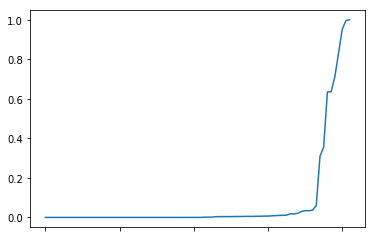

In [4]:
import matplotlib.pyplot as plt
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values())
(df.isnull().sum()/df.shape[0]).sort_values().plot()
plt.show()

In [5]:
pd.set_option('max_colwidth',1000)

In [6]:
drop_list = []

import operator 
# Find all the NaN
# See what percentage of each column is NaN
x_pct = {}
length = len(df)
for y in df.columns:
    if df[y].isnull().sum() > 0:
        x_cnt = df[y].isnull().sum()
        x_pct[y] = 100.0*x_cnt/length
        
x_pct_list = sorted(x_pct.items(), key=operator.itemgetter(1), reverse=True)
      
# Print the features, where more than 80% of the data is NaN    
for f, val in x_pct_list:
    if val > 80:
        print(f, val)
        drop_list.append(f)
        print('Dropping: ' + f)
        print('------')

PuaMode 99.97411865269486
Dropping: PuaMode
------
Census_ProcessorClass 99.58940682843873
Dropping: Census_ProcessorClass
------
DefaultBrowsersIdentifier 95.14163732644
Dropping: DefaultBrowsersIdentifier
------
Census_IsFlightingInternal 83.04402978742435
Dropping: Census_IsFlightingInternal
------


In [7]:
# Drop MachineIdentifier
drop_list.append('MachineIdentifier')

In [9]:
# Remove columns with only 1 unique value
# Should do in the end also.
# TODO
# df.dropna(thresh=2)
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print('Dropping: ' + col)
        drop_list.append(col)

In [10]:
# Now analyze one column at a time
start_cnt = 0
show_cnt = 5
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
    print(y, df[y].dtype)
start_cnt += show_cnt

                  MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  
0  4.18.1807.18075  1.273.1735.0  
1     4.13.17134.1    1.263.48.0  
2  4.18.1807.18075  1.273.1341.0  
3  4.18.1807.18075  1.273.1527.0  
4  4.18.1807.18075  1.273.1379.0  
MachineIdentifier object
ProductName object
EngineVersion object
AppVersion object
AvSigVersion object


In [11]:
def break_and_get_part(value, position):
    return value.split(".")[position]

In [12]:
df['EngineVersion_0'] = df['EngineVersion'].apply(break_and_get_part, position=0)
df['EngineVersion_1'] = df['EngineVersion'].apply(break_and_get_part, position=1)
df['EngineVersion_2'] = df['EngineVersion'].apply(break_and_get_part, position=2)
df['EngineVersion_3'] = df['EngineVersion'].apply(break_and_get_part, position=3)

df['AppVersion_0'] = df['AppVersion'].apply(break_and_get_part, position=0)
df['AppVersion_1'] = df['AppVersion'].apply(break_and_get_part, position=1)
df['AppVersion_2'] = df['AppVersion'].apply(break_and_get_part, position=2)
df['AppVersion_3'] = df['AppVersion'].apply(break_and_get_part, position=3)

df['AvSigVersion_0'] = df['AvSigVersion'].apply(break_and_get_part, position=0)
df['AvSigVersion_1'] = df['AvSigVersion'].apply(break_and_get_part, position=1)
df['AvSigVersion_2'] = df['AvSigVersion'].apply(break_and_get_part, position=2)
df['AvSigVersion_3'] = df['AvSigVersion'].apply(break_and_get_part, position=3)

drop_list.append('EngineVersion')
drop_list.append('AppVersion')
drop_list.append('AvSigVersion')

In [13]:
print(df['EngineVersion_0'].unique())
print(df['EngineVersion_1'].unique())
print(df['EngineVersion_2'].unique())
print(df['EngineVersion_3'].unique())
print(df['AppVersion_0'].unique())
print(df['AppVersion_1'].unique())
print(df['AppVersion_2'].unique())
print(df['AppVersion_3'].unique())
print(df['AvSigVersion_0'].unique())
print(df['AvSigVersion_1'].unique())
print(df['AvSigVersion_2'].unique())
print(df['AvSigVersion_3'].unique())

['1']
['1']
['15100' '14600' '15200' '15300' '13504' '14800' '15000' '14104' '13804'
 '14306' '13407' '14405' '14901' '14700' '14202' '13303' '13701' '13000'
 '14500' '14003' '13601' '13903' '12805' '13202' '12902' '14305' '13704'
 '14002' '14103' '13103' '14303' '14201' '13102' '11701' '12400' '14001'
 '11804' '10401' '13902' '14102' '12603' '12706' '12002' '13803' '12101'
 '13406' '13802' '10302' '11400' '12804' '12300' '12205' '11903' '12505'
 '11502' '9700' '11602' '13503' '13301' '11202' '11104' '12802' '10701']
['1' '4' '6' '0' '3' '2' '5']
['4']
['18' '13' '9' '10' '8' '12' '14' '11' '16' '6' '4' '7' '17' '5' '15']
['1807' '17134' '218' '1806' '1809' '209' '10240' '16299' '17639' '10586'
 '14393' '15063' '17656' '17007' '17613' '207' '204' '205' '305' '304'
 '17677' '17661' '17643' '216' '17686' '17672' '17666' '17682' '17650'
 '306' '17685' '17634' '17655' '17627' '219' '203' '212' '17618' '17604']
['18075' '1' '0' '18062' '2' '17914' '228' '15' '18041' '494' '1593' '589'
 '163

In [16]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   IsBeta  RtpStateBitfield  IsSxsPassiveMode  DefaultBrowsersIdentifier  \
0       0               7.0                 0                        NaN   
1       0               7.0                 0                        NaN   
2       0               7.0                 0                        NaN   
3       0               7.0                 0                        NaN   
4       0               7.0                 0                        NaN   

   AVProductStatesIdentifier  
0                    53447.0  
1                    53447.0  
2                    53447.0  
3                    53447.0  
4                    53447.0  
IsBeta int64
[0 1]
RtpStateBitfield float64
[ 7.  0. nan  3.  5.  8.  1. 35.]
IsSxsPassiveMode int64
[0 1]
DefaultBrowsersIdentifier float64
[  nan 1950.  146. ... 2327.  976. 1149.]
AVProductStatesIdentifier float64
[53447. 43927. 46413. ... 16684. 60602. 31745.]


In [18]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                 29   
1                  1.0                1.0       1                 93   
2                  1.0                1.0       1                 86   
3                  1.0                1.0       1                 88   
4                  1.0                1.0       1                 18   

   CityIdentifier  
0        128035.0  
1          1482.0  
2        153579.0  
3         20710.0  
4         37376.0  
AVProductsInstalled float64
[ 1.  2.  3.  5. nan  4.  6.  7.  0.]
AVProductsEnabled float64
[ 1.  2.  0.  4. nan  3.  5.]
HasTpm int64
[1 0]
CountryIdentifier int64
[ 29  93  86  88  18  97  78 164 107  80 171 169 157 178 158  43 147  12
 203 205 199   9  68 201 141  35 159 160 129  44 207  15  89   3 108  55
 195 214 148 100  16 155 190  95  53 204  94   8 152 110 184 132 122  57
  39  51  59  70  52 121 149 142  41   2 179 180  27 103 167 10

In [19]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          171   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor  
0  windows10       x64  
1  windows10       x64  
2  windows10       x64  
3  windows10       x64  
4  windows10       x64  
OrganizationIdentifier float64
[18. nan 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
GeoNameIdentifier float64
[ 35. 119.  64. 117. 277. 126.  89. 205. 138. 101. 211. 209. 199. 230.
 202.  53. 187.  15. 255. 274. 266.  10. 276. 267. 240.

In [20]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                    18.0               35.0                          171   
1                    18.0              119.0                           64   
2                    18.0               64.0                           49   
3                     NaN              117.0                          115   
4                     NaN              277.0                           75   

    Platform Processor  
0  windows10       x64  
1  windows10       x64  
2  windows10       x64  
3  windows10       x64  
4  windows10       x64  
OrganizationIdentifier float64
[18. nan 27. 46. 11. 14. 37. 10. 50. 49. 33.  8. 48. 36. 31.  4.  1. 28.
  3. 52. 32. 51.  5.  2. 47. 44. 16. 40. 20. 22. 29. 26. 21. 39.  6. 19.
  7. 30. 42. 43. 41. 15. 45. 25. 35. 23. 38. 12. 17. 34.]
GeoNameIdentifier float64
[ 35. 119.  64. 117. 277. 126.  89. 205. 138. 101. 211. 209. 199. 230.
 202.  53. 187.  15. 255. 274. 266.  10. 276. 267. 240.